# Regression(Lesson 1)
## Simple Linear Regression(SLR)

### First of all import needed packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
# Use this to show matplotlib and plots properly(But no essential)
%matplotlib inline

### Read the csv(Comma seperated value) file with pandas

In [3]:
Data_Frame = pd.read_csv('Fuel_Consumption.csv')

In [33]:
# Show the first 5 lines of the data frame >> .head() = .head(5)
# .head(int) > shows specific number of first lines of data-set
Data_Frame.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
# Access to one specific feature
Data_Frame['ENGINESIZE']

0       2.0
1       2.4
2       1.5
3       3.5
4       3.5
       ... 
1062    3.0
1063    3.2
1064    3.0
1065    3.2
1066    3.2
Name: ENGINESIZE, Length: 1067, dtype: float64

In [6]:
Data_Frame['ENGINESIZE'].head()

0    2.0
1    2.4
2    1.5
3    3.5
4    3.5
Name: ENGINESIZE, dtype: float64

In [8]:
Data_Frame.describe()
# std = 0 means that , all cars were made in 2014

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
# extract features which you want to use
Clear_Data_Frame = Data_Frame[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [10]:
Clear_Data_Frame.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


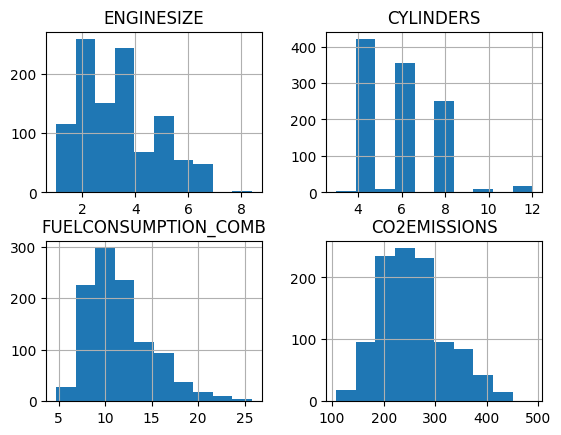

In [11]:
histogram = Clear_Data_Frame[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
histogram.hist()
plt.show()

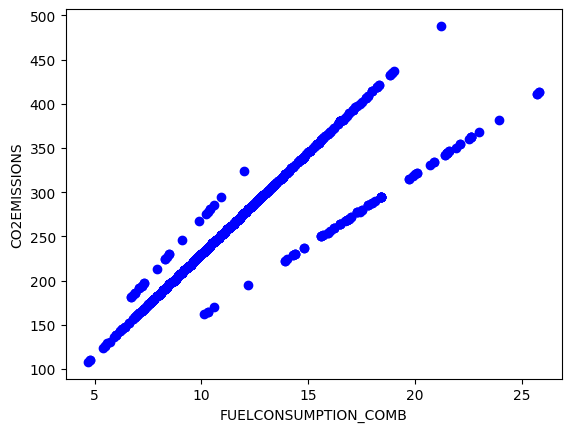

In [12]:
plt.scatter(Clear_Data_Frame.FUELCONSUMPTION_COMB,Clear_Data_Frame.CO2EMISSIONS,
           color = 'blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

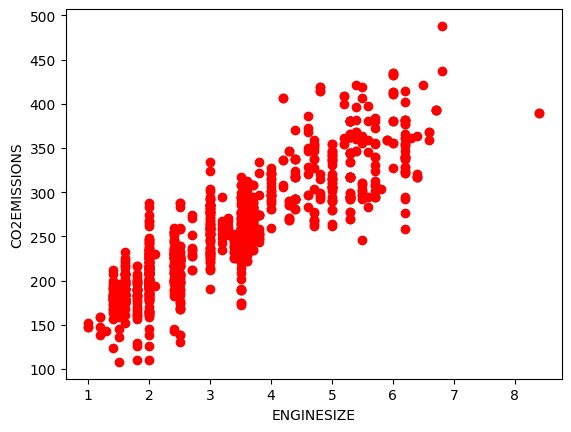

In [13]:
plt.scatter(Clear_Data_Frame.ENGINESIZE,Clear_Data_Frame.CO2EMISSIONS,
           color = 'red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

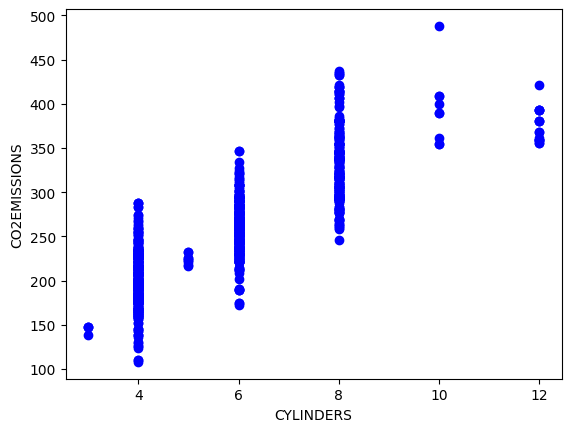

In [14]:
plt.scatter(Clear_Data_Frame.CYLINDERS,Clear_Data_Frame.CO2EMISSIONS,
           color = 'blue')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

### Split your data into test and train

In [35]:
# After finding the best feature , try to split your values into two parts
# The best way to split is : 80 % for training and 20 % for testing our model to prevent overfitting
# Create numbers Between 0 and 1
# Create a True and False matrix randomly
Mask = np.random.rand(len(Data_Frame)) < 0.8 # 80 % is True and 20 % is False
Train = Clear_Data_Frame[Mask]
Test = Clear_Data_Frame[~Mask] # ~ means not

In [34]:
np.random.rand() # this give you a random number

0.4632326861433458

In [35]:
np.random.rand(10) # this give you 10 random numbers or list of random numbers

array([0.59174894, 0.36846995, 0.33039322, 0.84742974, 0.61098752,
       0.66432487, 0.52879128, 0.02540492, 0.55535122, 0.48903835])

In [36]:
print(len(Data_Frame))
# This gives the total number of data or rows

1067


In [41]:
print(Mask)
print('--------------------------------------')
print(~Mask)
print('--------------------------------------')
print(Clear_Data_Frame)
print('--------------------------------------')
print(Train)
print('--------------------------------------')
print(Test)

[ True False False ...  True  True  True]
--------------------------------------
[False  True  True ... False False False]
--------------------------------------
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
3            3.5          6                  11.1           255
4            3.5          6                  10.6           244
...          ...        ...                   ...           ...
1062         3.0          6                  11.8           271
1063         3.2          6                  11.5           264
1064         3.0          6                  11.8           271
1065         3.2          6                  11.3           260
1066         3.2          6                  12.8           294

[1067 rows x 4 columns]
--------------------------------------
      

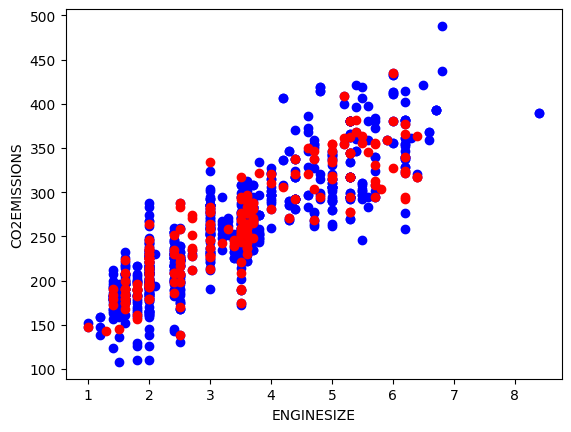

In [37]:
Figure = plt.figure()
image_one = Figure.add_subplot(111)
image_one.scatter(Train.ENGINESIZE,Train.CO2EMISSIONS,
           color = 'blue')
image_one.scatter(Test.ENGINESIZE,Test.CO2EMISSIONS,
           color = 'red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

### Create and run your model

In [45]:
from sklearn import linear_model
Regression = linear_model.LinearRegression()
# Convert data to array
Train_x = np.asanyarray(Train[['ENGINESIZE']])
Train_y = np.asanyarray(Train[['CO2EMISSIONS']])
# Find best answer
Regression.fit(Train_x,Train_y)
# Print co-efficients
print(Regression)
print('Co-efficients : ',Regression.coef_[0][0])
# Where the line starts on the y-axis
print('Intercept : ',Regression.intercept_[0])

LinearRegression()
Co-efficients :  39.57093071636223
Intercept :  123.68648295659247


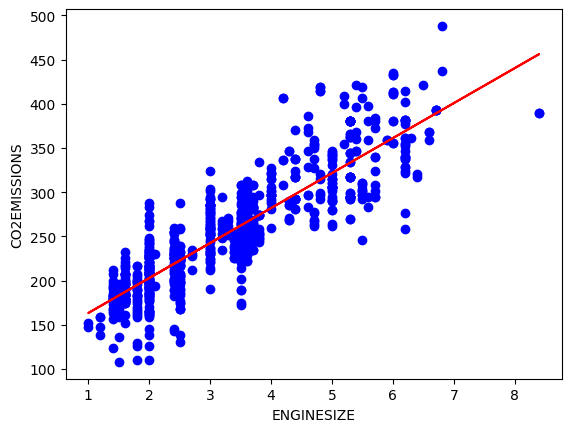

The line equation is : y = 39.57093071636223x + 123.68648295659247


In [54]:
plt.scatter(Train.ENGINESIZE,Train.CO2EMISSIONS,color = 'blue')
plt.plot(Train_x,Regression.coef_[0][0]*Train_x + Regression.intercept_[0],'-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()
print(f'The line equation is : y = {Regression.coef_[0][0]}x + {Regression.intercept_[0]}')

### Evaluate the accuracy of the model

In [34]:
from sklearn.metrics import r2_score
# Convert test data into numpy array
Test_x = np.asanyarray(Test[['ENGINESIZE']])
# Real value
Test_y = np.asanyarray(Test[['CO2EMISSIONS']])
Predicted_y = Regression.predict(Test_x)
print('Means absolute error : %.2f'% np.mean(np.absolute(Predicted_y - Test_y)))
print('Residual sum of mean squares(MSE) : %.2f'% np.mean((Predicted_y - Test_y)**2))
print('R2-score : %.2f'% r2_score(Predicted_y,Test_y))

Means absolute error : 23.64
Residual sum of mean squares(MSE) : 963.48
R2-score : 0.68


### Do something interesting

In [106]:
Engine_Size = float(input('Please enter your engine size :'))
Finall_Engine_Size = np.array([[Engine_Size]])

Please enter your engine size : 2


In [108]:
Predicted_y = Regression.predict(Finall_Engine_Size)
print(Predicted_y[0][0])

202.82834438931692


In [109]:
# Predicting the CO2 emmission
Predicted_CO2_Emission = Regression.coef_[0][0]*Engine_Size + Regression.intercept_[0]
print('The predicted CO2 emission for this engine size will be : ',Predicted_CO2_Emission)

The predicted CO2 emission for this engine size will be :  202.82834438931692
